# Market Basket Analysis (MBA)
### Estudando o comportamento do cliente por Market Basket Analysis.

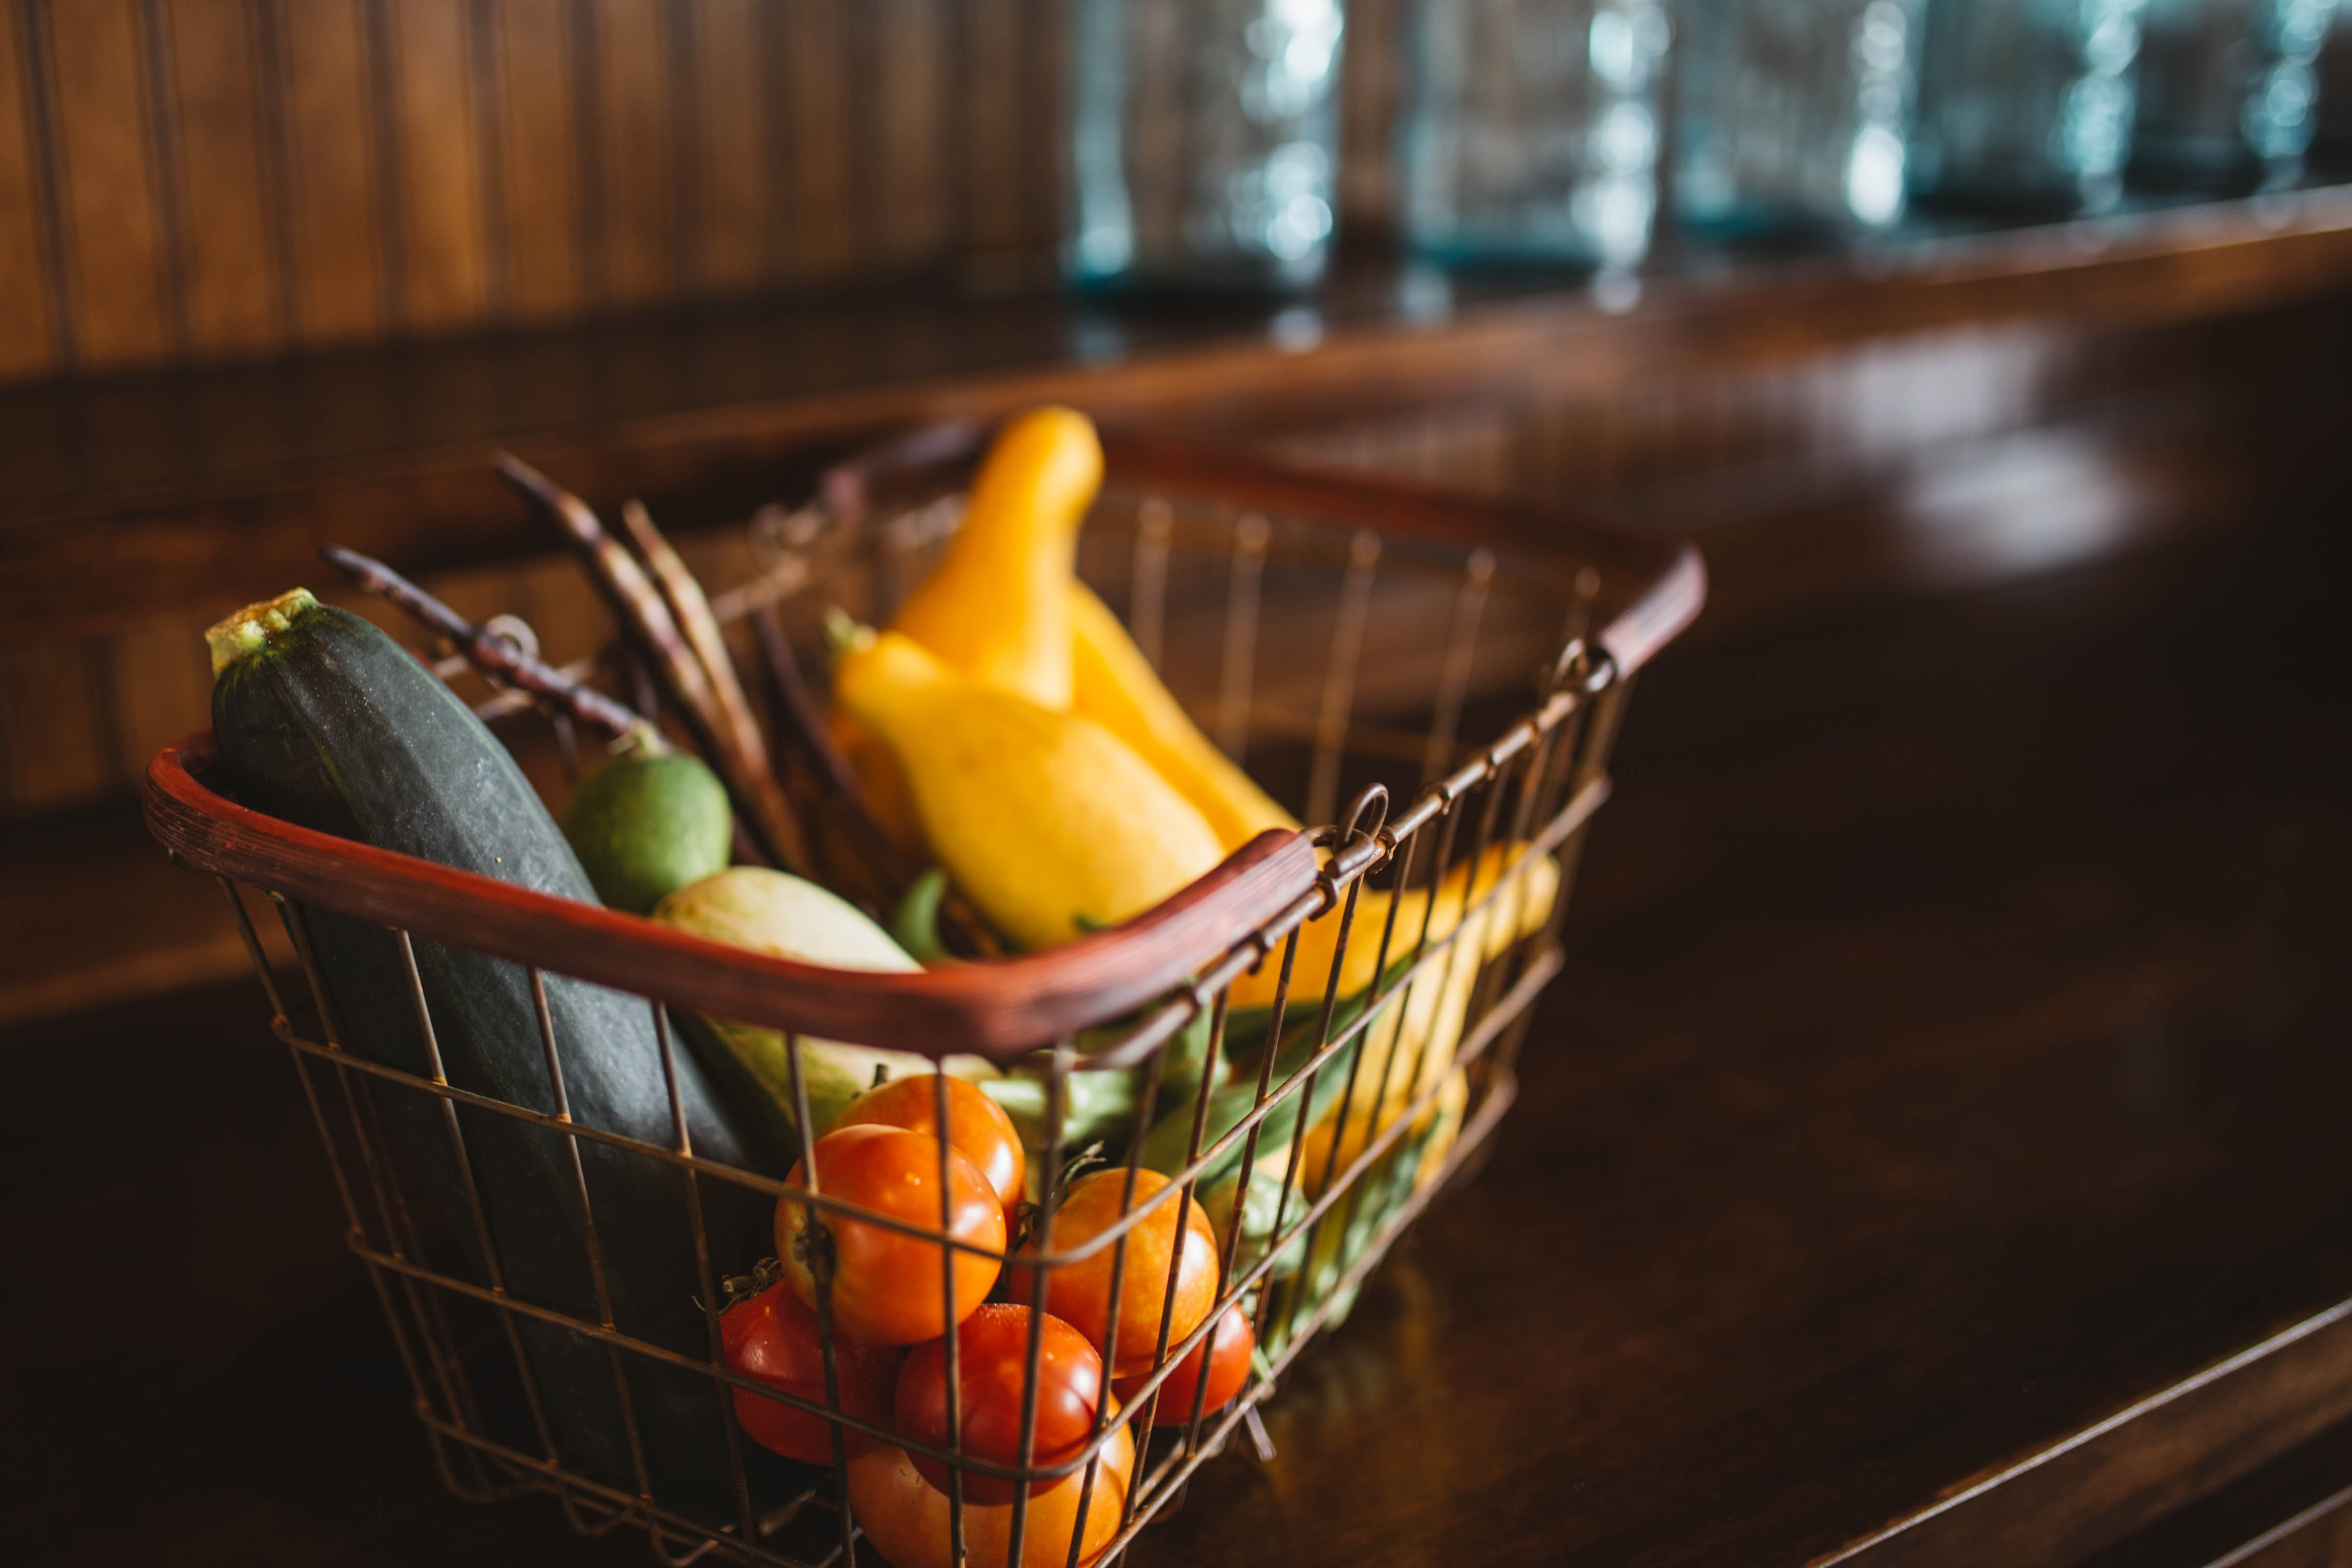   


## Estudando e antecipando o comportamento do cliente.
A modelagem do comportamento do cliente sempre foi - e sempre será - uma das inteligências mais buscadas por empresas que visam aumentar suas vendas, sua lucratividade e, especialmente, sua acertividade em relação ao que oferecer em suas prateleias, sejam elas físicas ou online.

As Regras de Associação (ou Association Rules), veio para ajudar nessa modelagem e tentar prever o comportamento de compra do cliente por meio dos dados transacionais da empresa. Basicamente, o estudo das notas fiscais, tickets e carrinhos de compra até sua conversão final.

A Análise de Cesta de Compras (ou Market Basket Analysis (MBA)), é uma análise exploratória de uma base de dados com histórico de transações que ajuda a explorar, limpar, filtrar, preparar e carregar em um modelo de Machine Learning, utilizando o algoritimo Apriori. 

Utilizando inferências estatísticas de Suporte, Confiança e Elevação, o modelo basicamente analisa a base de dados em busca de itens mais frequentes em uma amostra de transações concluídas e seus respectivos consequentes, ou itens que normalmente estão juntos na mesma transação.

Assim, o modelo ajuda a apontar os itens mais relevantes, conhecidos também como keystone products (ou itens chave), e seus respectivos "pares", gerando insights importantes para toda uma cadeia de negócios de varejo, tais como:

* Cross Sell: Ajustando o layout de uma planta física de vendas, aproximando produtos que geram grupos frequentes.
* Vendas Online: Um sistema de recomendação para portais de venda online (ou até mesmo em espaços físicos!), tal como "Os clientes que compraram A, também compraram B)
* Marketing: Construção de companhas promocionais voltadas para um público específico por diversos canais e promoções que ajudam a alavancar a venda de produtos frequentes. Pode-se dizer, o aproveitamento da sinergia.
* Supply e Logística: Entendimento da necessidade da disponibilidade de tais produtos (keystone products) a fim de não permitir rupturas de estoque e impacto nas vendas.

Nesse projeto de Machine Learning, será utilizado a biblioteca Mlxtend (http://rasbt.github.io/mlxtend/), importando a função Apriori, que irá intergir com a função Association Rules para descrição dos resultados.



# 1. Bibliotecas

In [1]:
# Importamos as principais bibliotecas para manipulação de dados e operações.
import numpy as np
import pandas as pd
from openpyxl import load_workbook

# Bibliotecas para poletagem dos gráficos utilizados.
import matplotlib.pyplot as plt
import colorsys
plt.style.use('seaborn-talk')

# Bibliotecas para visualizção gráfica
import seaborn as sn
import matplotlib.pyplot as plt

# Biblioteca datetime para manipulação de séries temporais
from datetime import datetime, timedelta

# Biblioteca MLXtend pra extender algumas funções de Machine Learning, trazendo o algoritimo Apriori para mineração de dados 
#e criação da base estatística, e Association_Rules para interagir com o Apriori, compilando as regras de associção geradas.
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
# Opção do pandas para mostrar quantidade de colunas sem quebrar a linha
pd.set_option('display.width', 180)

# 2. Carregamento dos dados

In [3]:
# Essa base de dados foi fornecida pelo Data Science Academy no módulo Business Analytics para um estudo de Marketing Analysis 
# e foi utilizada para o propósito desse projeto, que é encontrar Regras de Associação.
# A fonte de dados trata-se de um arquivo .csv, onde defininmos a primeira linha como cabeçalho.

dataset = pd.read_csv('dados/retail.csv', header = 0, encoding = 'unicode_escape')

# 3. Exploração da base de dados

In [4]:
dataset.head(10)

,NumeroFatura,CodigoProduto,NomeProduto,Quantidade,DataVenda,ValorUnitario,IdCliente,Pais
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,Brasil
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,Brasil
2,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,Brasil
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,Brasil
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,Brasil
5,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,Brasil
6,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,Brasil
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,Brasil
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,Brasil
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,Brasil


In [5]:
# Viisualizando as colunas do dataset

dataset.columns

Index(['NumeroFatura', 'CodigoProduto', 'NomeProduto', 'Quantidade', 'DataVenda', 'ValorUnitario', 'IdCliente', 'Pais'], dtype='object')

In [6]:
# Contagem de linhas e colunas

dataset.shape

(541800, 8)

In [7]:
# Informações estatísticas relevantes da base de dados.
# Aqui, podemos observar alguns problemas, como quantidade e valor unitário negativos.

dataset.describe()

,Quantidade,ValorUnitario,IdCliente
count,541800.000000,541800.000000,406725.000000
mean,9.551739,4.611581,15287.754038
std,218.103033,96.769576,1713.475925
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13954.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
# informações de contagem de valores 'não nulos' e as respectivas tipagens.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541800 entries, 0 to 541799
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   NumeroFatura   541800 non-null  object 
 1   CodigoProduto  541800 non-null  object 
 2   NomeProduto    540346 non-null  object 
 3   Quantidade     541800 non-null  int64  
 4   DataVenda      541800 non-null  object 
 5   ValorUnitario  541800 non-null  float64
 6   IdCliente      406725 non-null  float64
 7   Pais           541800 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
# Informação de valores únicos das colunas 'Pais' e 'NumeroFatura'
dataset[['Pais','NumeroFatura']].nunique()

Pais               37
NumeroFatura    25892
dtype: int64

In [10]:
# Quantidade de valores nulos na base de dados e sua presentativa porcetagem.

print(dataset.isnull().sum())
print('---')
print(dataset.isnull().sum() / len(dataset) * 100)

NumeroFatura          0
CodigoProduto         0
NomeProduto        1454
Quantidade            0
DataVenda             0
ValorUnitario         0
IdCliente        135075
Pais                  0
dtype: int64
---
NumeroFatura      0.000000
CodigoProduto     0.000000
NomeProduto       0.268365
Quantidade        0.000000
DataVenda         0.000000
ValorUnitario     0.000000
IdCliente        24.930786
Pais              0.000000
dtype: float64


In [11]:
# Um agrupamento da quantidade de transações distintas realizadas por cada país.

dataset[['Pais','NumeroFatura']].groupby(['Pais']).nunique()






,NumeroFatura
Pais,
Alemanha,603
Australia,69
Austria,19
Bahrain,4
Belgium,119
Brasil,23486
Canada,6
Channel Islands,33
Chile,5


<AxesSubplot:xlabel='Pais'>

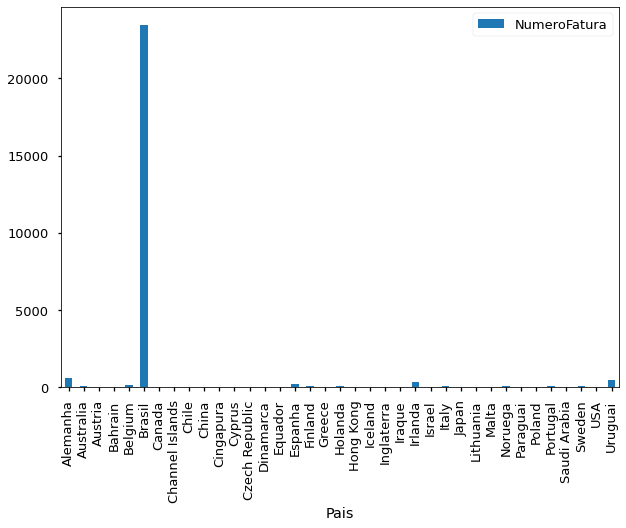

In [12]:
(dataset[['Pais','NumeroFatura']].groupby('Pais').nunique()).plot(kind='bar',figsize=(10,7))

<AxesSubplot:ylabel='Frequency'>

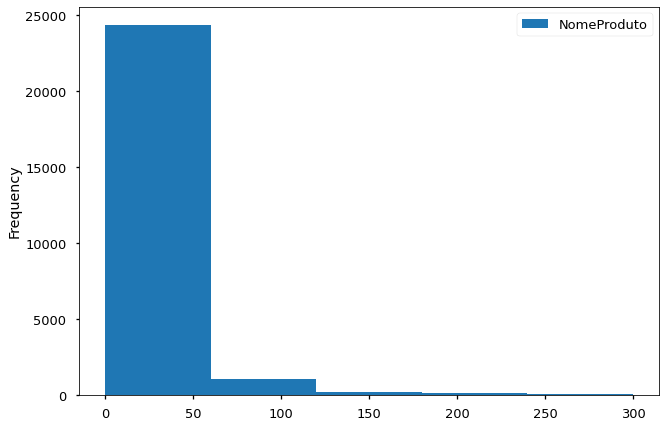

In [13]:
# Histograma para determinar a concentração média de itens por fatura.

dataset[['NumeroFatura', 'NomeProduto']].groupby('NumeroFatura').nunique().plot(kind='hist', range=(0,300),label="Item", bins = 5)

In [14]:
# Buscandoo possíveis outliers na coluna 'Quantidade', onde pode se verificar um aumento desproporcional após 5568.
# Por padronização nesse estudo, será desconsiderado os valores iguais ou maiores que 10000.


dataset['Quantidade'].nlargest(10)


540421    80995
61619     74215
502122    12540
74614      5568
421632     4800
206121     4300
220843     4000
97432      3906
270885     3186
52711      3114
Name: Quantidade, dtype: int64

In [15]:
# Buscando as transações com quantidades muito altas com o valor da indexação.

dataset.loc[[540421,61619,502122]]


,NumeroFatura,CodigoProduto,NomeProduto,Quantidade,DataVenda,ValorUnitario,IdCliente,Pais
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,Brasil
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,Brasil
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/2011 15:57,0.00,13256.0,Brasil


In [16]:
# Filtrando toda base de dados com base nas colunas 'Quantidade' e 'ValorUnitario' com parâmetros distintos e direcionados.

dataset.sort_values(by=['Quantidade', 'ValorUnitario'], ascending=[True, False])

,NumeroFatura,CodigoProduto,NomeProduto,Quantidade,DataVenda,ValorUnitario,IdCliente,Pais
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,Brasil
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,Brasil
225529,556690,23005,printing smudges/thrown away,-9600,6/14/2011 10:37,0.00,NaN,Brasil
225530,556691,23005,printing smudges/thrown away,-9600,6/14/2011 10:37,0.00,NaN,Brasil
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,Brasil
...,...,...,...,...,...,...,...,...
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,10/27/2011 12:26,0.21,12901.0,Brasil
74614,542504,37413,NaN,5568,1/28/2011 12:03,0.00,NaN,Brasil
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/2011 15:57,0.00,13256.0,Brasil
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,Brasil


# 4. Feature Engineering

In [17]:
# Criando a feature 'Faturamento' para complementação da base de dados e filtragem mais precisa.

dataset['Faturamento'] = dataset['Quantidade'] * dataset['ValorUnitario']

dataset

,NumeroFatura,CodigoProduto,NomeProduto,Quantidade,DataVenda,ValorUnitario,IdCliente,Pais,Faturamento
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,Brasil,25.50
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,Brasil,15.30
2,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,Brasil,20.34
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,Brasil,22.00
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,Brasil,20.34
...,...,...,...,...,...,...,...,...,...
541795,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,Uruguai,10.20
541796,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,Uruguai,12.60
541797,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,Uruguai,16.60
541798,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,Uruguai,16.60


In [18]:
dataset.describe()

,Quantidade,ValorUnitario,IdCliente,Faturamento
count,541800.000000,541800.000000,406725.000000,541800.000000
mean,9.551739,4.611581,15287.754038,17.986942
std,218.103033,96.769576,1713.475925,378.848746
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13954.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


# 5. Limpeza da base de dados

O método de limpeza que será usado será a criação de novos dataframes com os valores desejados para serem limpos.
É aplicado então a função .drop() com o dataframe 'cleaner_' e então salvo no dataframe principal para continuação dos estudos.
O processo será feito por partes para demonstrar cada etapa de limpeza.

In [19]:
# Filtrando a base de dados para selecionar apenas as faturas relacionadas ao Pais Brasil. O Filtro seleciona todos os valores
# diferentes de 'Brasil' e salva no dataframe 'cleaner_pais' para posterior drop no dataframe principal 'ds1'.

cleaner_pais = dataset.loc[dataset['Pais']!='Brasil']

cleaner_pais


,NumeroFatura,CodigoProduto,NomeProduto,Quantidade,DataVenda,ValorUnitario,IdCliente,Pais,Faturamento
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,Uruguai,90.00
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,Uruguai,90.00
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,Uruguai,45.00
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,Uruguai,10.20
30,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,Uruguai,15.60
...,...,...,...,...,...,...,...,...,...
541795,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,Uruguai,10.20
541796,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,Uruguai,12.60
541797,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,Uruguai,16.60
541798,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,Uruguai,16.60


In [20]:
# Dropando os valores filtrados no dataframe cleaner_pais e salvando no dataframe principal 'ds1'.

ds1 = dataset.drop(cleaner_pais.index)

ds1

,NumeroFatura,CodigoProduto,NomeProduto,Quantidade,DataVenda,ValorUnitario,IdCliente,Pais,Faturamento
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,Brasil,25.50
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,Brasil,15.30
2,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,Brasil,20.34
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,Brasil,22.00
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,Brasil,20.34
...,...,...,...,...,...,...,...,...,...
541745,581571,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,24,12/9/2011 12:00,2.55,15311.0,Brasil,61.20
541746,581572,23328,SET 6 SCHOOL MILK BOTTLES IN CRATE,48,12/9/2011 12:08,3.39,16705.0,Brasil,162.72
541747,581572,22627,MINT KITCHEN SCALES,4,12/9/2011 12:08,8.50,16705.0,Brasil,34.00
541748,581572,22624,IVORY KITCHEN SCALES,4,12/9/2011 12:08,8.50,16705.0,Brasil,34.00


In [21]:
# Comprovando o resultado do filtro, retornando apenas as transações relacionadas ao pais 'Brasil'.

ds1['Pais'].value_counts()

Brasil    495385
Name: Pais, dtype: int64

In [22]:
# Drop da coluna 'CodigoProduto', uma vez que é dispnesável para esse modelo.

ds1 = ds1.drop(columns='CodigoProduto')

ds1.head(10)

,NumeroFatura,NomeProduto,Quantidade,DataVenda,ValorUnitario,IdCliente,Pais,Faturamento
0,536365,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,Brasil,25.50
1,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,Brasil,15.30
2,536365,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,Brasil,20.34
3,536365,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,Brasil,22.00
4,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,Brasil,20.34
5,536365,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,Brasil,20.34
6,536365,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,Brasil,15.30
7,536366,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,Brasil,11.10
8,536366,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,Brasil,11.10
9,536367,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,Brasil,54.08


## 5.1 Limpeza de valores nulos e negativos

In [23]:
# Localizando os dados de faturamento que são iguais a 0.
ds1.loc[(ds1['Faturamento'] <= 0)]

,NumeroFatura,NomeProduto,Quantidade,DataVenda,ValorUnitario,IdCliente,Pais,Faturamento
141,C536379,Discount,-1,12/1/2010 9:41,27.50,14527.0,Brasil,-27.50
154,C536383,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,Brasil,-4.65
235,C536391,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,Brasil,-19.80
236,C536391,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,Brasil,-6.96
237,C536391,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,Brasil,-6.96
...,...,...,...,...,...,...,...,...
540449,C581490,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,Brasil,-9.13
541536,C581499,Manual,-1,12/9/2011 10:28,224.69,15498.0,Brasil,-224.69
541710,C581568,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,Brasil,-54.75
541711,C581569,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,Brasil,-1.25


In [24]:
# Criando o dataframe 'cleaner', que sera usado para filtrar os valores indesejados e dropar no dataframe principal.

cleaner_faturamento = ds1.loc[(ds1['Faturamento'] <= 0)]

cleaner_faturamento

,NumeroFatura,NomeProduto,Quantidade,DataVenda,ValorUnitario,IdCliente,Pais,Faturamento
141,C536379,Discount,-1,12/1/2010 9:41,27.50,14527.0,Brasil,-27.50
154,C536383,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,Brasil,-4.65
235,C536391,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,Brasil,-19.80
236,C536391,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,Brasil,-6.96
237,C536391,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,Brasil,-6.96
...,...,...,...,...,...,...,...,...
540449,C581490,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,Brasil,-9.13
541536,C581499,Manual,-1,12/9/2011 10:28,224.69,15498.0,Brasil,-224.69
541710,C581568,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,Brasil,-54.75
541711,C581569,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,Brasil,-1.25


In [25]:
# Utilizando o comando drop para dropar todas as colunas indesejadas, filtradas anteriormente no 'cleaner_total' e
# inserido o resultado desse drop em um novo datafram 'ds1'

ds1 = ds1.drop(cleaner_faturamento.index)

In [26]:
# Comprovação do resultado de limpeza, não retornando valores menores ou igual a 0.
ds1.loc[(ds1['Faturamento'] <= 0)]



,NumeroFatura,NomeProduto,Quantidade,DataVenda,ValorUnitario,IdCliente,Pais,Faturamento


In [27]:
# Reafirmação do resultado de limpeza, demonstrando que não há valores 'True', ou valores menores ou igual 0, 
# pela função .value_counts().

(ds1['Faturamento'] <= 0).value_counts()

False    485030
Name: Faturamento, dtype: int64

In [28]:
# Comprovando pelos dados estatísticos do novo dataframe 'ds1'
ds1.describe()

,Quantidade,ValorUnitario,IdCliente,Faturamento
count,485030.000000,485030.000000,354233.000000,485030.000000
mean,9.610195,3.849977,15552.508660,18.603258
std,161.919574,34.680679,1594.397209,281.306932
min,1.000000,0.001000,12346.000000,0.001000
25%,1.000000,1.250000,14194.000000,3.360000
50%,3.000000,2.100000,15522.000000,8.420000
75%,10.000000,4.130000,16931.000000,16.950000
max,80995.000000,13541.330000,18287.000000,168469.600000


## 5.2 Tratamento de Outliers

In [29]:
# Buscando valores de Quantidade superiores à 1000

ds1.sort_values(['Quantidade'], ascending = False)

,NumeroFatura,NomeProduto,Quantidade,DataVenda,ValorUnitario,IdCliente,Pais,Faturamento
540421,581483,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,Brasil,168469.60
61619,541431,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,Brasil,77183.60
421632,573008,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,10/27/2011 12:26,0.21,12901.0,Brasil,1008.00
206121,554868,SMALL POPCORN HOLDER,4300,5/27/2011 10:52,0.72,13135.0,Brasil,3096.00
97432,544612,EMPIRE DESIGN ROSETTE,3906,2/22/2011 10:43,0.82,18087.0,Brasil,3202.92
...,...,...,...,...,...,...,...,...
418155,572703,RED BABY BUNTING,1,10/25/2011 14:35,2.95,16110.0,Brasil,2.95
418156,572703,FELTCRAFT CHRISTMAS FAIRY,1,10/25/2011 14:35,4.25,16110.0,Brasil,4.25
418157,572703,FELTCRAFT PRINCESS CHARLOTTE DOLL,1,10/25/2011 14:35,3.75,16110.0,Brasil,3.75
418158,572703,FELTCRAFT DOLL ROSIE,1,10/25/2011 14:35,2.95,16110.0,Brasil,2.95


In [30]:
# Encontrando as transações com a coluna 'Quantidade' com valor superior à 1000.

ds1.loc[ds1['Quantidade'] > 1000]

,NumeroFatura,NomeProduto,Quantidade,DataVenda,ValorUnitario,IdCliente,Pais,Faturamento
4850,536809,ASSORTED COLOUR T-LIGHT HOLDER,1824,12/2/2010 16:48,0.55,15299.0,Brasil,1003.20
4945,536830,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,12/2/2010 17:38,0.18,16754.0,Brasil,518.40
4946,536830,RED HARMONICA IN BOX,1400,12/2/2010 17:38,1.06,16754.0,Brasil,1484.00
16435,537659,CREAM HEART CARD HOLDER,1008,12/7/2010 16:43,2.31,18102.0,Brasil,2328.48
16436,537659,BLACK HEART CARD HOLDER,1008,12/7/2010 16:43,2.31,18102.0,Brasil,2328.48
...,...,...,...,...,...,...,...,...
521375,580363,VINTAGE DOILY JUMBO BAG RED,1500,12/2/2011 16:32,1.79,13868.0,Brasil,2685.00
533812,581115,METAL SIGN TAKE IT OR LEAVE IT,1404,12/7/2011 12:20,2.75,15195.0,Brasil,3861.00
540070,581458,POPCORN HOLDER,1500,12/8/2011 18:45,0.72,17949.0,Brasil,1080.00
540071,581459,POPCORN HOLDER,1200,12/8/2011 18:46,0.72,17949.0,Brasil,864.00


In [31]:
# Limpando as transações com valores da coluna 'Quantidade' superiores à 1000.
cleaner_quantidade = (ds1.loc[ds1['Quantidade'] > 1000])

cleaner_quantidade

,NumeroFatura,NomeProduto,Quantidade,DataVenda,ValorUnitario,IdCliente,Pais,Faturamento
4850,536809,ASSORTED COLOUR T-LIGHT HOLDER,1824,12/2/2010 16:48,0.55,15299.0,Brasil,1003.20
4945,536830,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,12/2/2010 17:38,0.18,16754.0,Brasil,518.40
4946,536830,RED HARMONICA IN BOX,1400,12/2/2010 17:38,1.06,16754.0,Brasil,1484.00
16435,537659,CREAM HEART CARD HOLDER,1008,12/7/2010 16:43,2.31,18102.0,Brasil,2328.48
16436,537659,BLACK HEART CARD HOLDER,1008,12/7/2010 16:43,2.31,18102.0,Brasil,2328.48
...,...,...,...,...,...,...,...,...
521375,580363,VINTAGE DOILY JUMBO BAG RED,1500,12/2/2011 16:32,1.79,13868.0,Brasil,2685.00
533812,581115,METAL SIGN TAKE IT OR LEAVE IT,1404,12/7/2011 12:20,2.75,15195.0,Brasil,3861.00
540070,581458,POPCORN HOLDER,1500,12/8/2011 18:45,0.72,17949.0,Brasil,1080.00
540071,581459,POPCORN HOLDER,1200,12/8/2011 18:46,0.72,17949.0,Brasil,864.00


In [32]:
# Limpeza das transações com quantidades maiores que 1000 e inseridos no dataframe 'ds1'

ds1 = ds1.drop(cleaner_quantidade.index)

In [33]:
# Compravação da base de dados com estatísticas, mostrando o max com valor muito alto para 'Quantidades'

ds1.describe()

,Quantidade,ValorUnitario,IdCliente,Faturamento
count,484932.000000,484932.000000,354137.000000,484932.000000
mean,8.963232,3.850567,15552.466918,17.805818
std,26.467109,34.684156,1594.356216,86.439172
min,1.000000,0.001000,12747.000000,0.001000
25%,1.000000,1.250000,14194.000000,3.360000
50%,3.000000,2.100000,15522.000000,8.420000
75%,10.000000,4.130000,16931.000000,16.950000
max,1000.000000,13541.330000,18287.000000,38970.000000


In [34]:
ds1

,NumeroFatura,NomeProduto,Quantidade,DataVenda,ValorUnitario,IdCliente,Pais,Faturamento
0,536365,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,Brasil,25.50
1,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,Brasil,15.30
2,536365,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,Brasil,20.34
3,536365,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,Brasil,22.00
4,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,Brasil,20.34
...,...,...,...,...,...,...,...,...
541745,581571,ROTATING SILVER ANGELS T-LIGHT HLDR,24,12/9/2011 12:00,2.55,15311.0,Brasil,61.20
541746,581572,SET 6 SCHOOL MILK BOTTLES IN CRATE,48,12/9/2011 12:08,3.39,16705.0,Brasil,162.72
541747,581572,MINT KITCHEN SCALES,4,12/9/2011 12:08,8.50,16705.0,Brasil,34.00
541748,581572,IVORY KITCHEN SCALES,4,12/9/2011 12:08,8.50,16705.0,Brasil,34.00


# 6. Apriori

## 6.1 Criação e transformação do Dataframe Pivot para Apriori

In [35]:
# Criação da tabela pivot para aplicação do Apiori, utilizando o pivot_table

ds1_pivot = ds1.pivot_table(index = ['NumeroFatura'], columns = ['NomeProduto'], values = 'Quantidade')

ds1_pivot

NomeProduto,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
NumeroFatura,,,,,,,,,,,,,,,,,,,,,
536365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
581567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
581571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Preenchendo os valores NaN com 0

ds1_pivot = ds1_pivot.fillna(0)

ds1_pivot

NomeProduto,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
NumeroFatura,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Convertendo valores maiores que 1 para 1

def zerar_itens(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [38]:
# Criando o dataframe 'cesta1' para aplicar a função 'encode_units' através do applymap no dataframe pivoteado 'ds1_pivot'.
# O Apriori exige uma lista pivot com o index Fatura (nesse caso 'NumeroFatura'), e com as colunas referente a cada item
# de compra da base de dados. Os valores, ficam são do tipo boolean, indicando ou não a compra desse item. O Apriori não lida 
# com a quantidade comprada, mas sim a presença ou ausencia de um determinado item em um determinado index (ou NumeroFatura).

cesta1 = ds1_pivot.applymap(zerar_itens)

In [39]:
# Dataframe preparado para ser aplicado o algoritmo Apriori.

cesta1.head(5)

NomeProduto,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
NumeroFatura,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 7. Treinando o modelo Apriori e Association Rules 

In [40]:
# Aplicação do Apirori com o dataframe devidamente tratado para o algoritmo.
# O algoritmo é então aplicado com o parametro de suporte para 0.08 e é salvo em um novo dataframe 'itemset1'.
# Aqui, o algoritmo aprende a base de dados, extrai os conjuntos de itens de acordo com os parametros de suporte e constrói
# a lista de itens mais frequentes. Essa lista se chama 'itemset'

itemset1 = apriori(cesta1, min_support=0.02, use_colnames=True)

itemset1

,support,itemsets
0,0.020187,(3 HOOK PHOTO SHELF ANTIQUE WHITE)
1,0.024302,(3 STRIPEY MICE FELTCRAFT)
2,0.021855,(4 TRADITIONAL SPINNING TOPS)
3,0.047548,(6 RIBBONS RUSTIC CHARM)
4,0.020632,(60 CAKE CASES DOLLY GIRL DESIGN)
...,...,...
395,0.020465,"(WOODEN STAR CHRISTMAS SCANDINAVIAN, WOODEN HE..."
396,0.027361,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY..."
397,0.020298,"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS..."
398,0.022467,"(JUMBO BAG PINK POLKADOT, JUMBO STORAGE BAG SU..."


In [45]:
# Criação das regras de associação
# O 'association_rules', é um pacote que interage com o Apriori, quebrando as lista e trazendo item a item de acordo com seus
# dados estatísticos. Nesse ponto, pode-se estudar as interações separademente e começar extrair os insights para o negócio
# em uma etapa de visualização mais elaborada.

regras = association_rules(itemset1, metric="support", min_threshold=0.02)

regras

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PACK OF 72 RETROSPOT CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.062729,0.041875,0.022689,0.361702,8.637620,0.020063,1.501062
1,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.041875,0.062729,0.022689,0.541833,8.637620,0.020063,2.045695
2,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.051663,0.048660,0.031253,0.604952,12.432273,0.028740,2.408161
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.048660,0.051663,0.031253,0.642286,12.432273,0.028740,2.651102
4,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE PINK),0.051663,0.036481,0.021855,0.423036,11.596074,0.019970,1.669980
...,...,...,...,...,...,...,...,...,...
213,"(JUMBO STORAGE BAG SUKI, JUMBO SHOPPER VINTAGE...",(JUMBO BAG RED RETROSPOT),0.028473,0.107496,0.021299,0.748047,6.958810,0.018238,3.542340
214,"(JUMBO BAG RED RETROSPOT, JUMBO SHOPPER VINTAG...",(JUMBO STORAGE BAG SUKI),0.036481,0.062785,0.021299,0.583841,9.299059,0.019009,2.252062
215,(JUMBO STORAGE BAG SUKI),"(JUMBO BAG RED RETROSPOT, JUMBO SHOPPER VINTAG...",0.062785,0.036481,0.021299,0.339238,9.299059,0.019009,1.458194
216,(JUMBO BAG RED RETROSPOT),"(JUMBO STORAGE BAG SUKI, JUMBO SHOPPER VINTAGE...",0.107496,0.028473,0.021299,0.198138,6.958810,0.018238,1.211588


In [46]:
# Visualizando as colunas do dataframe 'regras' para aplicação de filtros.

regras.columns

Index(['antecedents', 'consequents', 'antecedent support', 'consequent support', 'support', 'confidence', 'lift', 'leverage', 'conviction'], dtype='object')

# 8. Conclusão

## 8.1 Suporte, Confiança e Elevação (Support, Confidence, Lift)

Os parâmetros utilizados pelo Apriori, são basicamente 3:

Suporte (Support): É a frequência relativa de um produto dentre todas as transações geradas. Por princípio, itens ou regras com maior suporte, geram regras mais consistentes. Um ponto de atenção é que, com um suporte muito elevado, a regra pode ser muito óbvia. O universo amostral é o total de transações.

Confiança (Confidence): É frequência de um item consequente estar presente em uma transação com um determinado antecedente. Em outras palavras, quando A (antecedente) aparece, B (consequente) aparece em uma determinada frequência. O universo amostral é o total da sua regra antecedente.

Elevação (Lift): Pode ser compreendido como a "força" de uma regra(A e B). Quanto mais próximo de 1, mais independente é a regra, indicando uma possível regra aleatória. Quanto maior o lift, mais "interessante" é caracterizada a regra.

In [61]:
# Aplicando um filtro no dataframe regras, colocando em ordem decrescente os valores de suporte e confiança, definindo a listagem
# para tomada de decisão com base nesses parâmetros.

regras_filter = regras.sort_values(by=['support','lift'], ascending = [False, True])

regras_filter

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
66,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.064398,0.107496,0.043544,0.676166,6.290126,0.036621,2.756051
67,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.107496,0.064398,0.043544,0.405070,6.290126,0.036621,1.572625
36,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.053164,0.051830,0.038928,0.732218,14.127400,0.036172,3.540824
37,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.051830,0.053164,0.038928,0.751073,14.127400,0.036172,3.803668
93,(JUMBO BAG RED RETROSPOT),(JUMBO STORAGE BAG SUKI),0.107496,0.062785,0.038761,0.360579,5.743081,0.032012,1.465725
...,...,...,...,...,...,...,...,...,...
155,(RED RETROSPOT CHARLOTTE BAG),(LUNCH BAG RED RETROSPOT),0.050217,0.077355,0.020076,0.399779,5.168093,0.016191,1.537174
24,(JUMBO BAG WOODLAND ANIMALS),(DOTCOM POSTAGE),0.040874,0.039261,0.020076,0.491156,12.509880,0.018471,1.888082
25,(DOTCOM POSTAGE),(JUMBO BAG WOODLAND ANIMALS),0.039261,0.040874,0.020076,0.511331,12.509880,0.018471,1.962733
60,(JUMBO BAG APPLES),(JUMBO STORAGE BAG SUKI),0.049160,0.062785,0.020020,0.407240,6.486259,0.016933,1.581103


In [67]:
# Tomando com um exemplo a primeira linha da lista final de regras:
# O Item Green Regency Teacup com o item Roses Regency tem como consequente o item Pink Regency Teacup and Soucer. Esta regra 
# aparece em 70,5% da base de dados, sendo que no total dessa regra, o item consequente foi comprado 70,5% das vezes. A força 
# dessa regra é 18,38, indicando uma regra interessante para se investir nesse conjunto de itens (itemset) para campanhas de 
# marketing e promoções.

regras_filter['lift'].nlargest()

192    27.141417
193    27.141417
196    18.029639
197    18.029639
195    17.417695
Name: lift, dtype: float64

In [70]:
regras_filter.loc[[192, 193, 196, 197, 195]]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
192,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.026638,0.028306,0.020465,0.768267,27.141417,0.019711,4.193166
193,(WOODEN HEART CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.028306,0.026638,0.020465,0.722986,27.141417,0.019711,3.513769
196,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",(PINK REGENCY TEACUP AND SAUCER),0.038928,0.038983,0.027361,0.702857,18.029639,0.025843,3.234190
197,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",0.038983,0.038928,0.027361,0.701854,18.029639,0.025843,3.223500
195,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.030308,0.051830,0.027361,0.902752,17.417695,0.025790,9.750054


# 9. Exportando o dataframe de regras para Excel

In [71]:
# Exportando a lista de regras geradas para o arquivo association_rules.xlsx (excel), na aba "association_rules"
regras_filter.to_excel("association_rules.xlsx", 'association_rules')